<a href="https://colab.research.google.com/github/Mannan-10/Machine-Learning-Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('/content/drive/MyDrive/ML Datasets/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


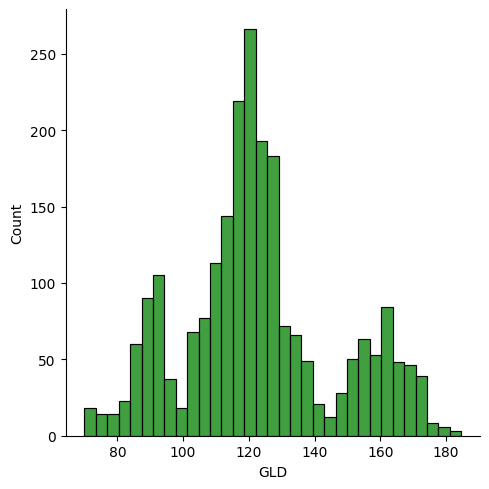

In [11]:
sns.displot(gold_data['GLD'],color='green')

In [13]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [15]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [17]:
reg = RandomForestRegressor(n_estimators=100)

In [18]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
test_data_prediction = reg.predict(x_test)

In [20]:
print(test_data_prediction)

[168.71189973  82.00399993 115.98040052 127.67960073 120.77520139
 154.59979793 150.74289805 126.24280009 117.63299887 125.99940093
 116.56210093 172.30150103 141.6192986  167.97299863 115.1283
 117.49980034 136.6886032  170.02520054 159.15280394 159.84309999
 155.12450021 125.26770057 175.57129921 156.67320317 125.24400009
  93.61949967  78.04449993 121.13570007 119.09179914 167.48039934
  88.27100017 125.22919993  91.36760055 117.67790034 121.17879941
 136.34660161 115.40780098 115.39860068 147.75859894 107.2092006
 104.16910244  87.14929793 126.52610063 117.84120025 155.27659916
 119.65280032 108.46119988 108.39099788  93.09450045 127.0864976
  75.08030052 113.63769904 121.29180016 111.30399917 118.86019873
 120.82299934 159.3959008  166.30010103 147.19159726  86.00429846
  94.48220027  86.84969842  90.64830029 118.86010101 126.55070053
 127.60810017 170.50159984 122.19019946 117.14009881  98.80310025
 168.18540135 143.41449819 132.06050242 121.1425025  121.12939947
 119.92300067 11

In [21]:
err = metrics.r2_score(y_test,test_data_prediction)

In [22]:
print("R squared error: ",err)

R squared error:  0.9891336944209695


In [23]:
y_test = list(y_test)

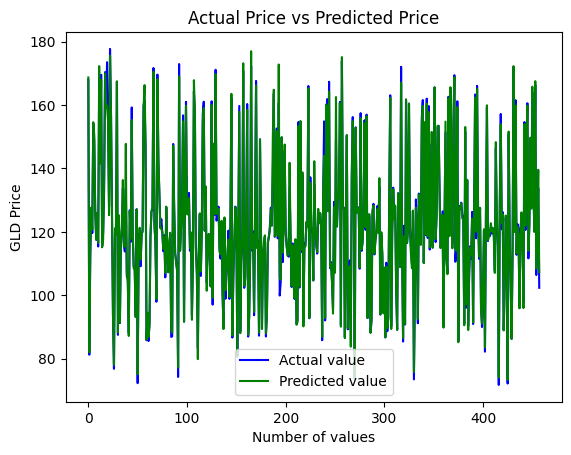

In [24]:
plt.plot(y_test,color='blue', label='Actual value')
plt.plot(test_data_prediction,color='green', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()